In [33]:
# 7/22/21: https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2


# end cite

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

from utils_child import analysis

In [38]:


def display_scores(is_mean, is_success, which_key):
    
    assert is_success, "Temporary assert until know what to visualize for entropy"
    
    stat_type = 'Mean' if is_mean else 'Standard deviation'
    metric_type = f'{"prior" if "prior" in which_key else "posterior"} surprisal'# if is_success else 'posterior entropy'
    
    score_df, score_arr = analysis.organize_scores(is_success = is_success, is_mean = is_mean, which_key = which_key)
    display_words = [col for col in score_df.columns if 'child name' not in col]
    
    num_x_ticks = len(display_words)

    # For text annotations and color bar
    # 6/2 : https://www.pythonprogramming.in/heatmap-with-intermediate-color-text-annotations.html

    fig, ax = plt.subplots(figsize=(15, 15))

    plt.title(f'{stat_type} {metric_type} for cross-child analysis')

    im = ax.imshow(score_arr, cmap = "YlGnBu")
    fig.colorbar(im)

    textcolors = ["k", "w"] 

    #6/2 hide ticks: https://www.delftstack.com/howto/matplotlib/how-to-hide-axis-text-ticks-and-or-tick-labels-in-matplotlib/
    #6/2 rotation: https://www.delftstack.com/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
    #6/2 xtick text: https://www.mathworks.com/help/matlab/creating_plots/change-tick-marks-and-tick-labels-of-graph-1.html

    plt.ylabel('Test items from child')
    plt.xlabel('Prior fine-tuned on child')
    
    plt.xticks(range(num_x_ticks), display_words, rotation = 45)
    plt.yticks(range(num_x_ticks), display_words)
    
    threshold = 6

    for i in range(len(display_words)):
        for j in range(len(display_words)):
            this_val = round(score_arr[i][j].item(), 3)
            ax.text(j, i, this_val, ha="center", va="center", color=textcolors[this_val > threshold])

    # End taken code

    plt.show()

[autoreload of utils_child.analysis failed: Traceback (most recent call last):
  File "/home/nwong/chompsky/childes/child_listening_continuation/child-listening-env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/nwong/chompsky/childes/child_listening_continuation/child-listening-env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/nwong/chompsky/childes/child_listening_continuation/child-listening-env/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/nwong/chompsky/childes/child_listening_continuation/child-listening-env/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bo

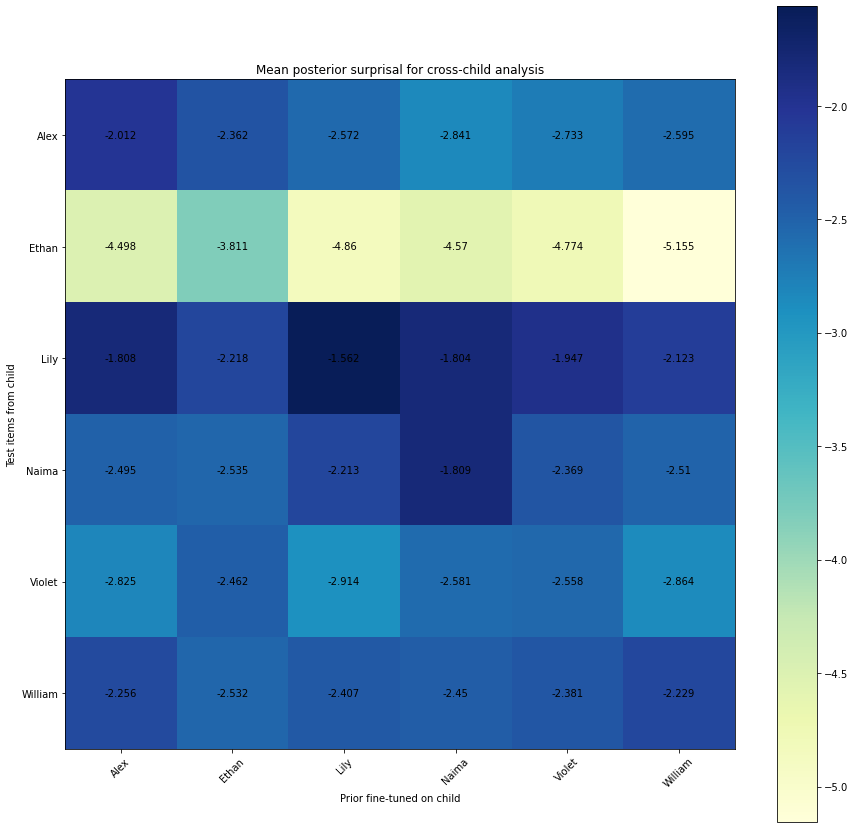

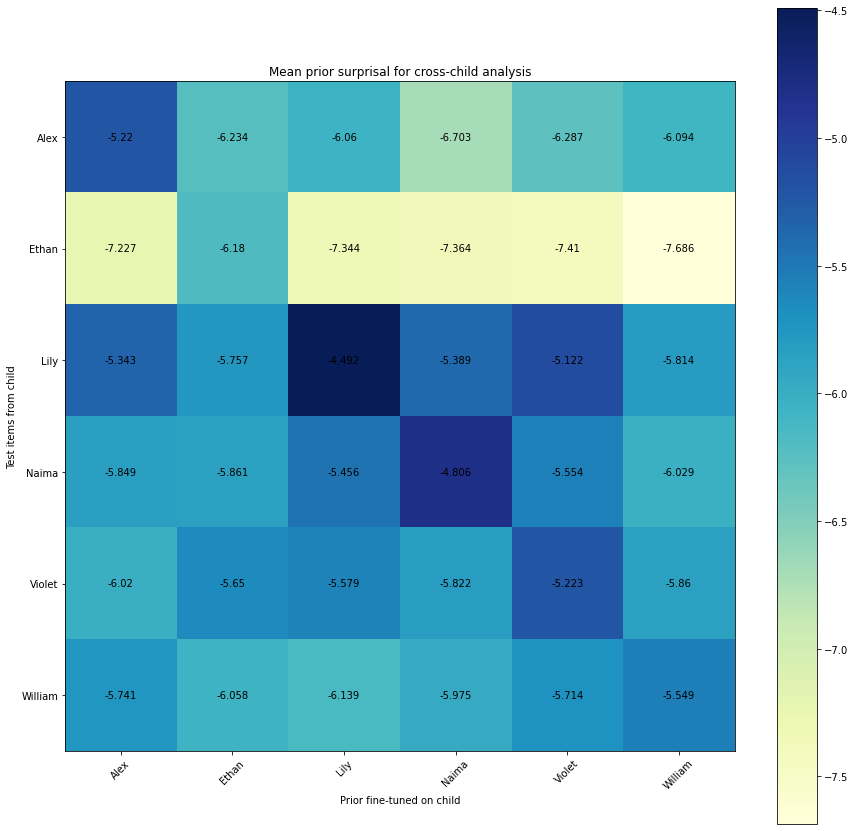

In [40]:

import importlib
importlib.reload(analysis)
 
display_scores(is_mean = True, is_success = True, which_key = 'posterior_surprisal')
display_scores(is_mean = True, is_success = True, which_key = 'prior_surprisal')

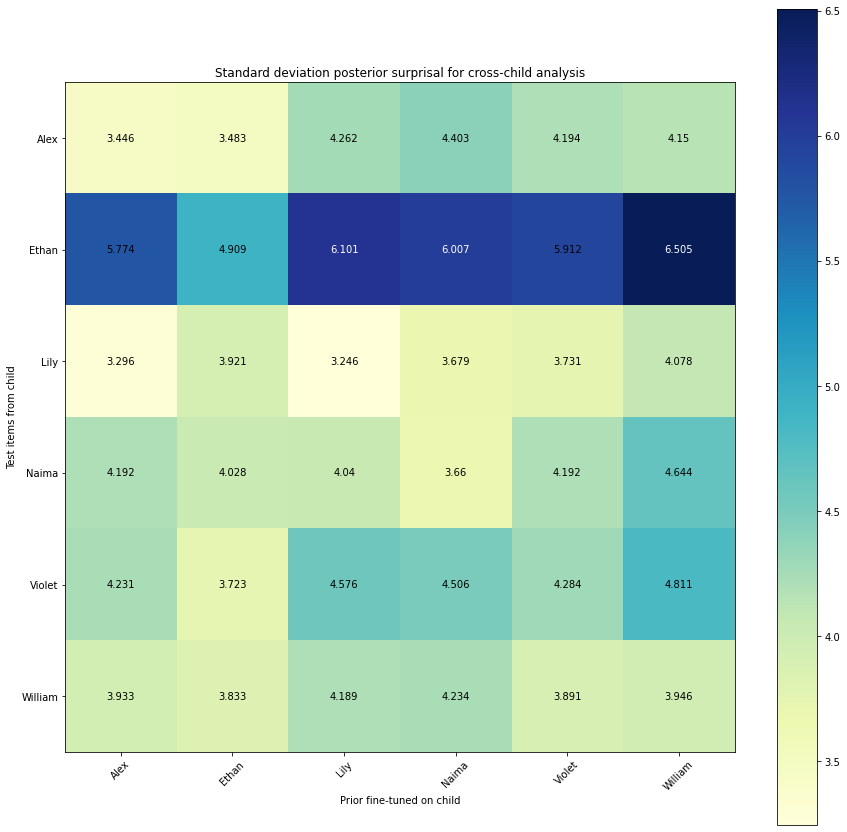

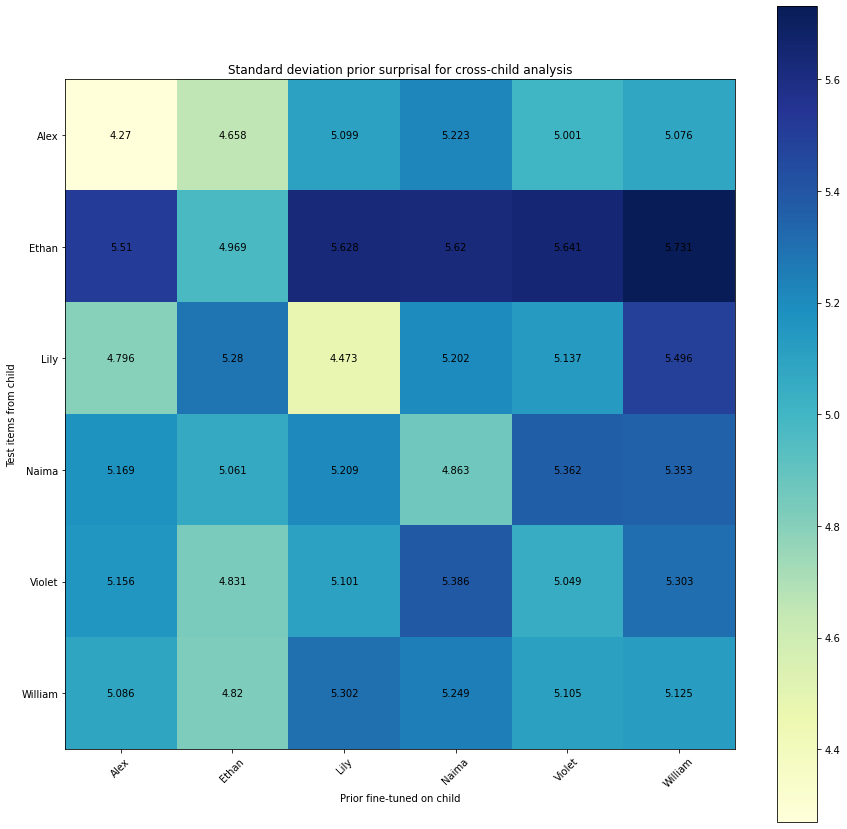

In [41]:

import importlib
importlib.reload(analysis)
 
display_scores(is_mean = False, is_success = True, which_key = 'posterior_surprisal')
display_scores(is_mean = False, is_success = True, which_key = 'prior_surprisal')

# Analyzing failures

In [74]:
import importlib
importlib.reload(analysis)

# How to input to this code?
# You need to load the cross scoring, then do what?

cross_scores = analysis.load_all_scores()
cross_scores['token'] = cross_scores['token'].astype(str)
cross_scores_short = cross_scores[['posterior_surprisal','posterior_entropy','prior_surprisal',
    'kl_flat_to_prior', 'kl_flat_to_posterior', 'cross_type','set','token','bert_token_id', 'edit_distance']]


In [75]:
cross_scores_short.columns

Index(['posterior_surprisal', 'posterior_entropy', 'prior_surprisal',
       'kl_flat_to_prior', 'kl_flat_to_posterior', 'cross_type', 'set',
       'token', 'bert_token_id', 'edit_distance'],
      dtype='object')

In [76]:
%R -i cross_scores_short

In [77]:

%%R
library(plotROC)

cross_scores_short$set_binarized = 0
cross_scores_short$set_binarized[cross_scores_short$set == 'failure'] = 1
table(cross_scores_short$set_binarized)


    0     1 
42690 17832 


In [78]:

%%R
# Get AUC scores into these
unique(as.character(cross_scores_short$cross_type))

 [1] "data-Alex+prior_child-Alex"       "data-Alex+prior_child-Ethan"     
 [3] "data-Alex+prior_child-Lily"       "data-Alex+prior_child-Naima"     
 [5] "data-Alex+prior_child-Violet"     "data-Alex+prior_child-William"   
 [7] "data-Ethan+prior_child-Alex"      "data-Ethan+prior_child-Ethan"    
 [9] "data-Ethan+prior_child-Lily"      "data-Ethan+prior_child-Naima"    
[11] "data-Ethan+prior_child-Violet"    "data-Ethan+prior_child-William"  
[13] "data-Lily+prior_child-Alex"       "data-Lily+prior_child-Ethan"     
[15] "data-Lily+prior_child-Lily"       "data-Lily+prior_child-Naima"     
[17] "data-Lily+prior_child-Violet"     "data-Lily+prior_child-William"   
[19] "data-Naima+prior_child-Alex"      "data-Naima+prior_child-Ethan"    
[21] "data-Naima+prior_child-Lily"      "data-Naima+prior_child-Naima"    
[23] "data-Naima+prior_child-Violet"    "data-Naima+prior_child-William"  
[25] "data-Violet+prior_child-Alex"     "data-Violet+prior_child-Ethan"   
[27] "data-Violet+prior_c

In [82]:

%%R
library('pROC')
auc_by_model = do.call('rbind', lapply(unique(cross_scores_short$cross_type), 
      function(model_name){
    one_model = subset(cross_scores_short, cross_type == model_name)
    roc1 = roc(one_model$set_binarized, one_model$posterior_entropy)
    return(data.frame(cross_type=model_name, auc = auc(roc1)))}))

cross_scores_short = merge(cross_scores_short, auc_by_model)


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case =

In [83]:
%%R
cross_scores_short$model_with_auc = paste0(cross_scores_short$cross_type,' (AUC = ',
round(cross_scores_short$auc, 3),')')

In [84]:
%%R
cross_scores_short$model_with_auc[1:10]

 [1] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [2] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [3] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [4] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [5] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [6] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [7] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [8] "data-Alex+prior_child-Alex (AUC = 0.814)"
 [9] "data-Alex+prior_child-Alex (AUC = 0.814)"
[10] "data-Alex+prior_child-Alex (AUC = 0.814)"


In [86]:
# Now, plot the heatmap?

%R -o cross_scores_short

In [88]:
unique_cross_auc = cross_scores_short[['cross_type', 'auc']].drop_duplicates()

In [ ]:
# How to plot this as a heatmap?

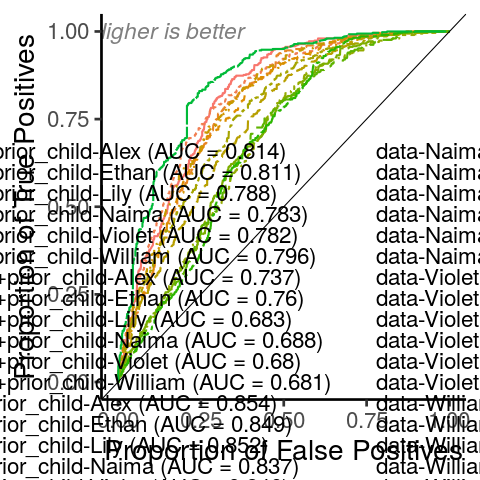

In [85]:


%%R 
p1 = ggplot(cross_scores_short[,c('set_binarized', 'model_with_auc', 'posterior_entropy')], 
       aes(d=set_binarized, m=posterior_entropy, color=model_with_auc, linetype = model_with_auc)
) + theme_classic(base_size=28)+ geom_roc(n.cuts=0) + xlab('Proportion of False Positives'
) + ylab('Proportion of True Positives') + theme(legend.position=c(.67, .20),
legend.background = element_blank(), legend.title = element_blank()) + annotate("text",
label= "Higher is better", size=8, fontface="italic", x=.15, y=1, alpha =.5) + geom_abline(intercept=0, slope=1)
print(p1)
ggsave('figures/roc_2.pdf', height=12, width=12)    